<a href="https://www.kaggle.com/code/anshtanwar/pycaret-classify-loan-borrowers?scriptVersionId=138798093" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="background-color:#118C4F; padding: 40px;color:white">Classification of Loan Borrowers</div>

![](http://media2.giphy.com/media/3o6MbqeA01e9HsNV8k/giphy.gif)


## Thanks for Visting this notebook 😊
<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana;">
    In this notebook I have used PyCaret AutoML for Classification of Loan Borrowers.Feel free to fork or edit the notebook. If you liked the notebook, consider upvoting it. It helps other people discover them.
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install pyxlsb

# <div style="background-color:#118C4F; padding: 20px;color:white">Reading Data</div>

In [3]:
train = pd.read_excel(io='/kaggle/input/credit-classification-for-banks/Training.xlsb')
test = pd.read_excel(io='/kaggle/input/credit-classification-for-banks/Test.xlsb')


In [4]:
train.head()

,ID,A,B,C,D,E,F,G,H,I,...,P,Q,R,S,T,U,V,W,X,MARKER
0,1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,Woman,...,2 Two,property,No,Works,Yes,Yes,No,Yes,No,0
1,2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,Woman,...,2 Two,otherwise,No,Works,Yes,Yes,Yes,Yes,No,0
2,3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,Woman,...,1 One,property,No,No couple,No,Yes,No,Yes,No,0
3,4,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,Woman,...,0 Zero,property,No,No couple,Yes,Yes,Few,Yes,No,0
4,5,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,Woman,...,0 Zero,property,No,No couple,Yes,No,No,No,No,0


In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,89734.0,44867.500000,25904.118865,1.000000,22434.250000,44867.500000,67300.750000,89734.000000
A,89734.0,0.167863,0.153851,0.000002,0.065843,0.119133,0.220000,7.067250
B,89734.0,0.113511,0.105340,0.000001,0.042922,0.079733,0.146990,0.874025
C,89734.0,85.801266,105.366771,0.000000,20.570000,50.020000,108.930000,2682.420000
D,89734.0,548.507954,448.686233,49.980000,227.030000,408.735000,746.710000,4999.000000
E,89734.0,1.011455,0.910583,0.000016,0.405983,0.749403,1.333367,35.337000
F,89734.0,0.683640,0.622047,0.000012,0.263775,0.499387,0.899260,10.352991
G,89734.0,7.854358,4.754588,2.000000,4.000000,5.000000,13.000000,24.000000
H,89734.0,0.510274,0.928146,0.000000,0.000000,0.000000,0.010000,3.500000
J,89734.0,41.140778,11.129976,21.000000,32.083333,40.000000,50.000000,64.916667


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89734 entries, 0 to 89733
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      89734 non-null  int64  
 1   A       89734 non-null  float64
 2   B       89734 non-null  float64
 3   C       89734 non-null  float64
 4   D       89734 non-null  float64
 5   E       89734 non-null  float64
 6   F       89734 non-null  float64
 7   G       89734 non-null  int64  
 8   H       89734 non-null  float64
 9   I       89734 non-null  object 
 10  J       89734 non-null  float64
 11  K       89734 non-null  object 
 12  L       89734 non-null  int64  
 13  M       89734 non-null  object 
 14  N       89734 non-null  object 
 15  O       89734 non-null  object 
 16  P       89734 non-null  object 
 17  Q       89734 non-null  object 
 18  R       89734 non-null  object 
 19  S       89734 non-null  object 
 20  T       89734 non-null  object 
 21  U       89734 non-null  object 
 22

# <div style="background-color:#118C4F; padding: 20px;color:white">Renaming known Columns</div>

In [7]:
#Rename some properties' names
#Reference:Authors Notebook
train.rename(columns={'I': 'Sex'}, inplace=True)
train.rename(columns={'K': 'Region'}, inplace=True)
train.rename(columns={'M': 'Job_title'}, inplace=True)
train.rename(columns={'N': 'Education'}, inplace=True)
train.rename(columns={'O': 'Marriage'}, inplace=True)
train.rename(columns={'P': 'Children'}, inplace=True)
train.rename(columns={'Q': 'Property'}, inplace=True)
train.rename(columns={'S': 'Employment_status'}, inplace=True)

test.rename(columns={'I': 'Sex'}, inplace=True)
test.rename(columns={'K': 'Region'}, inplace=True)
test.rename(columns={'M': 'Job_title'}, inplace=True)
test.rename(columns={'N': 'Education'}, inplace=True)
test.rename(columns={'O': 'Marriage'}, inplace=True)
test.rename(columns={'P': 'Children'}, inplace=True)
test.rename(columns={'Q': 'Property'}, inplace=True)
test.rename(columns={'S': 'Employment_status'}, inplace=True)

train = train.drop(['ID'], axis=1)
test = test.drop(['ID'], axis=1)

In [8]:
train.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Sex', 'J', 'Region', 'L',
       'Job_title', 'Education', 'Marriage', 'Children', 'Property', 'R',
       'Employment_status', 'T', 'U', 'V', 'W', 'X', 'MARKER'],
      dtype='object')

# <div style="background-color:#118C4F; padding: 20px;color:white"> EDA</div>

In [9]:
print("All Columns")
print(train.columns)


All Columns
Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Sex', 'J', 'Region', 'L',
       'Job_title', 'Education', 'Marriage', 'Children', 'Property', 'R',
       'Employment_status', 'T', 'U', 'V', 'W', 'X', 'MARKER'],
      dtype='object')


In [10]:
categorical_columns = []
continuous_columns = []
for col in train.columns:
    if train[col].dtype == 'object':
        # If the column has 'object' data type, it is categorical
        categorical_columns.append(col)
    else:
        # If the column has numerical data type, it is continuous
        continuous_columns.append(col)

print("Categorical columns:")
print(categorical_columns)

print("\nContinuous columns:")
print(continuous_columns)


Categorical columns:
['Sex', 'Region', 'Job_title', 'Education', 'Marriage', 'Children', 'Property', 'R', 'Employment_status', 'T', 'U', 'V', 'W', 'X']

Continuous columns:
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'L', 'MARKER']


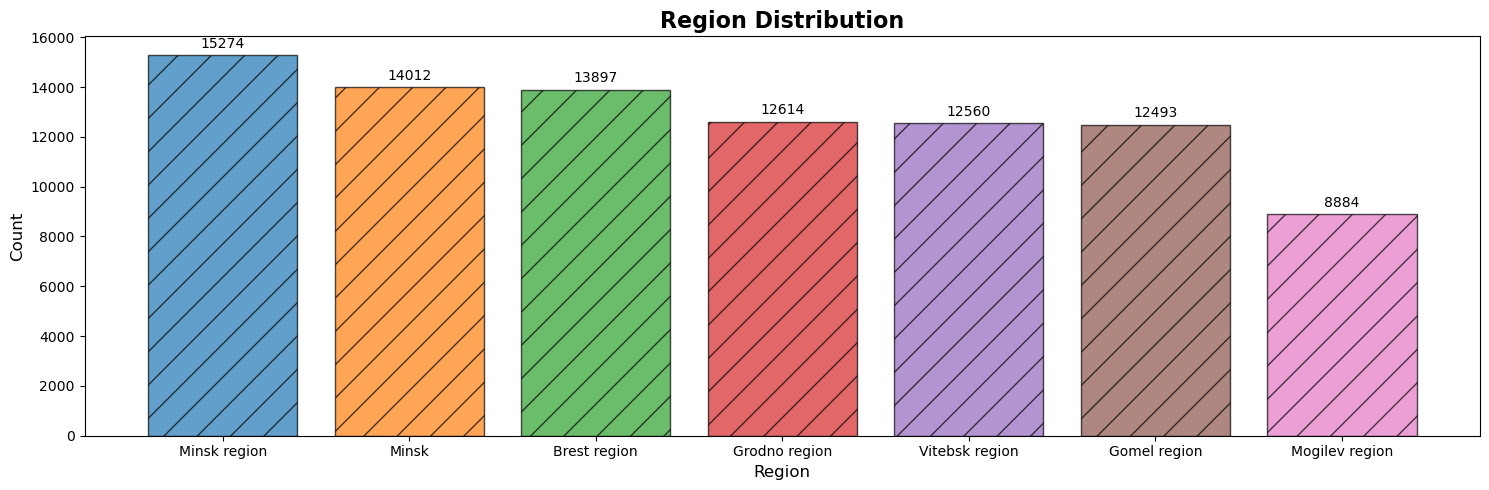

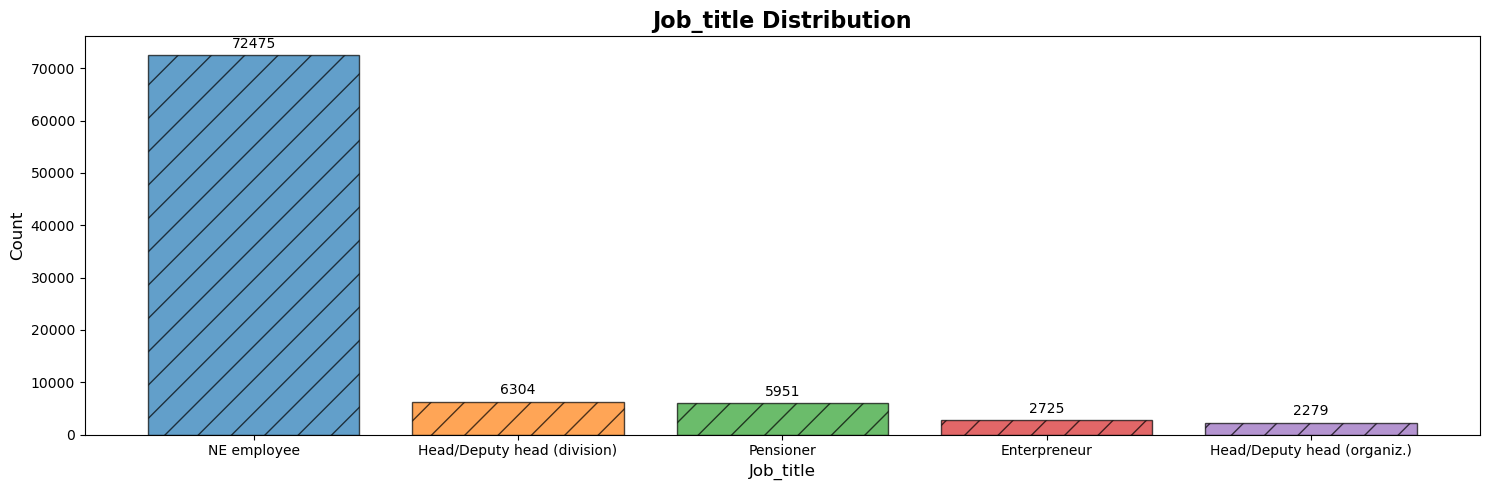

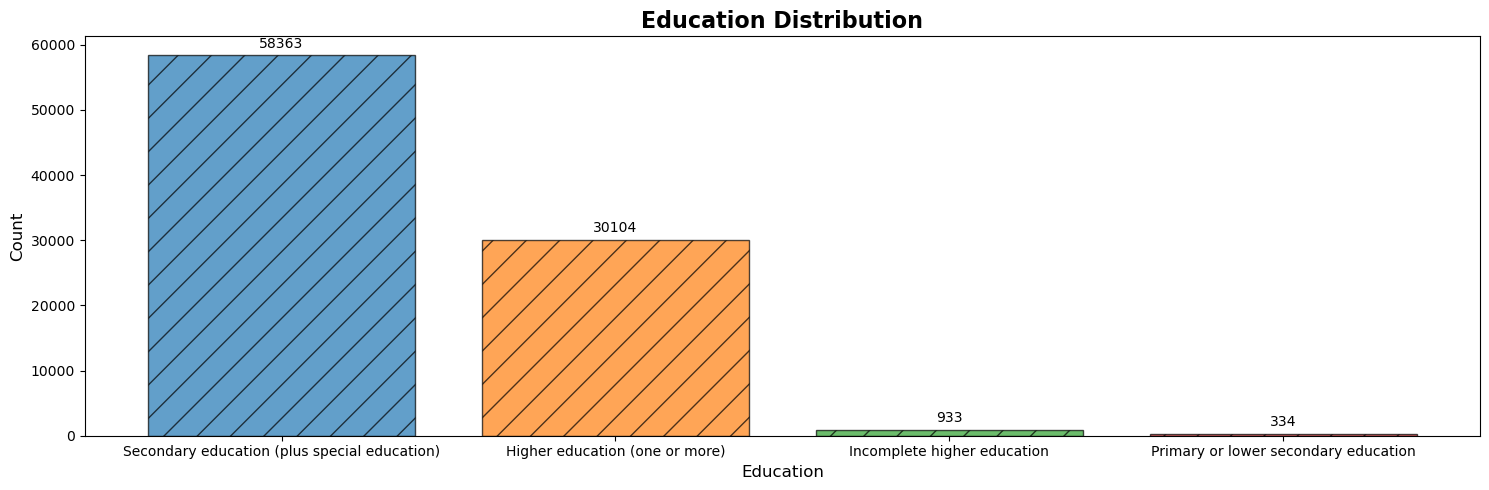

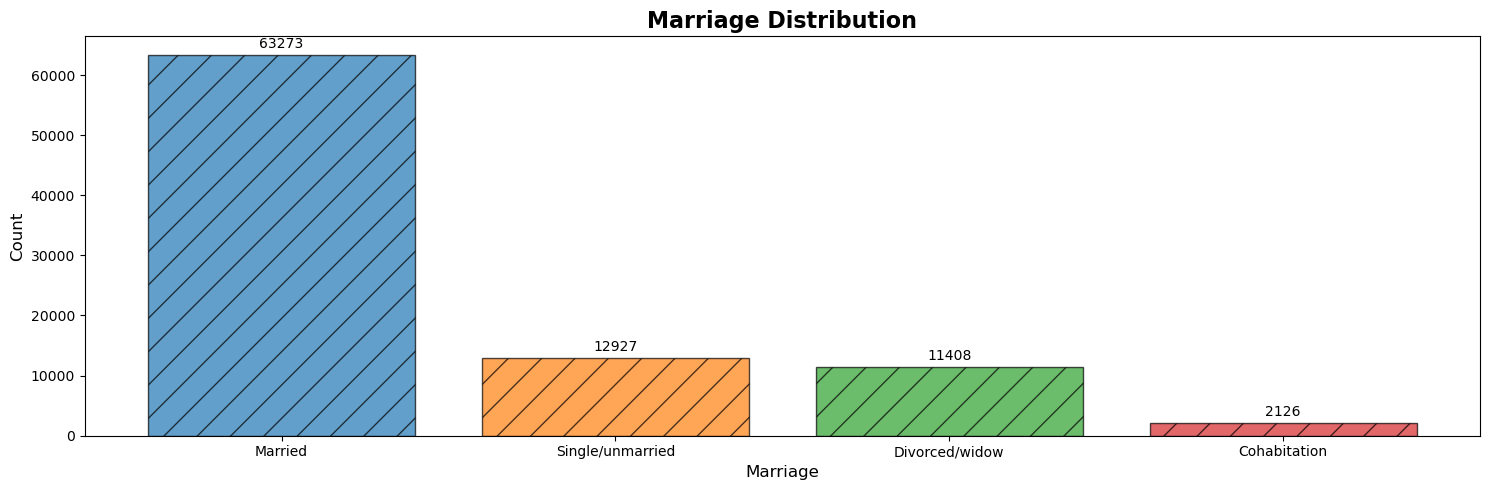

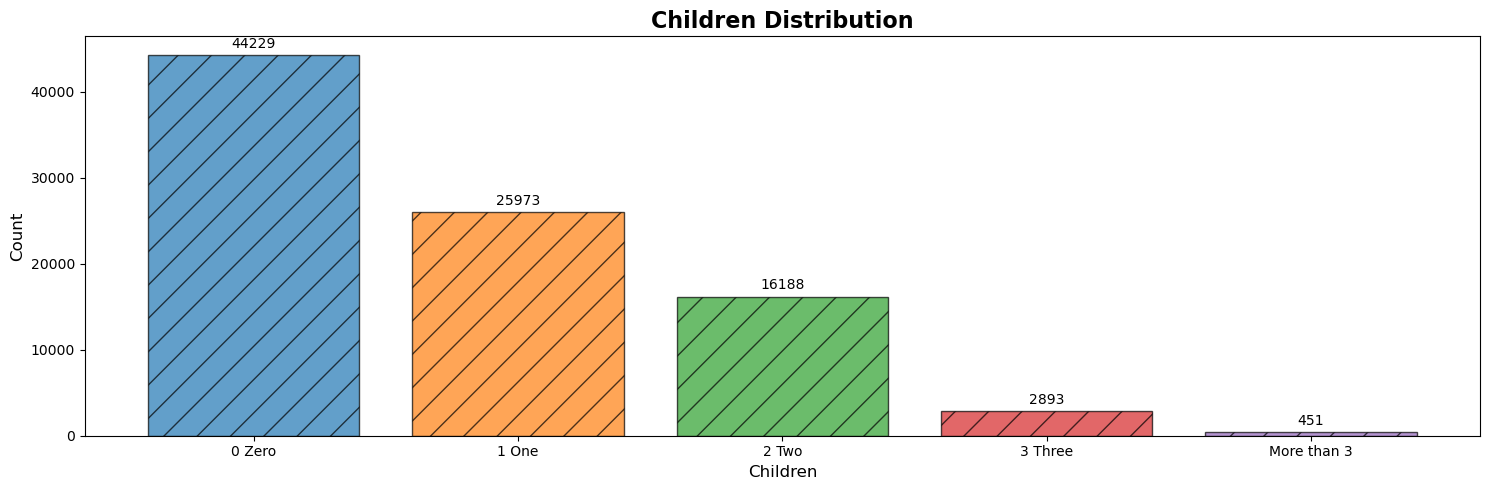

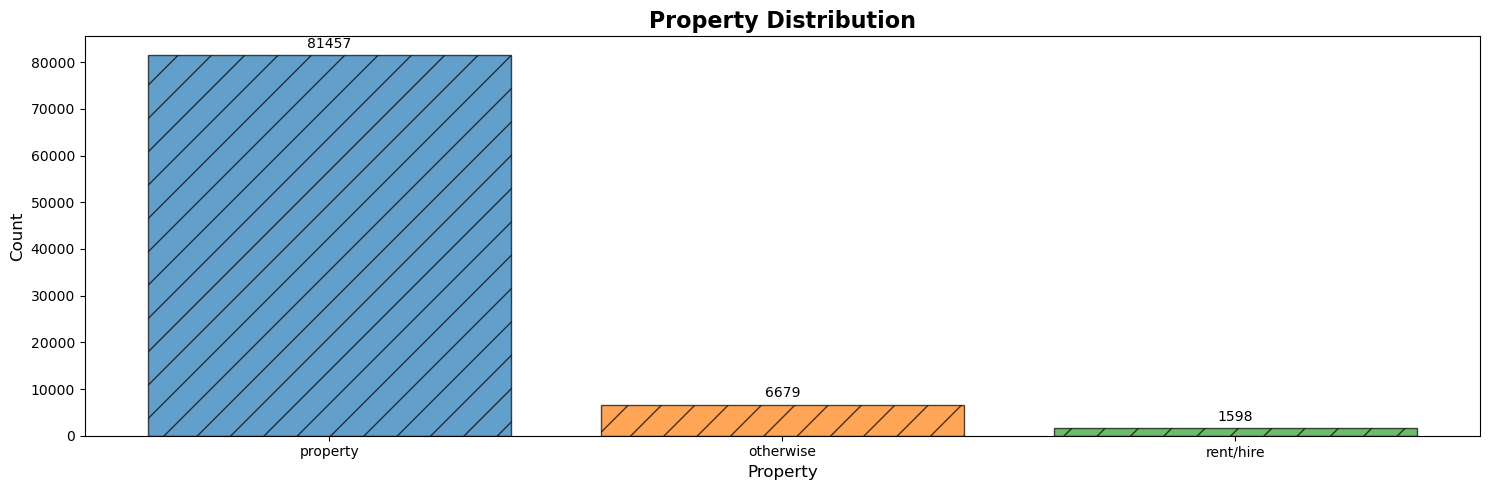

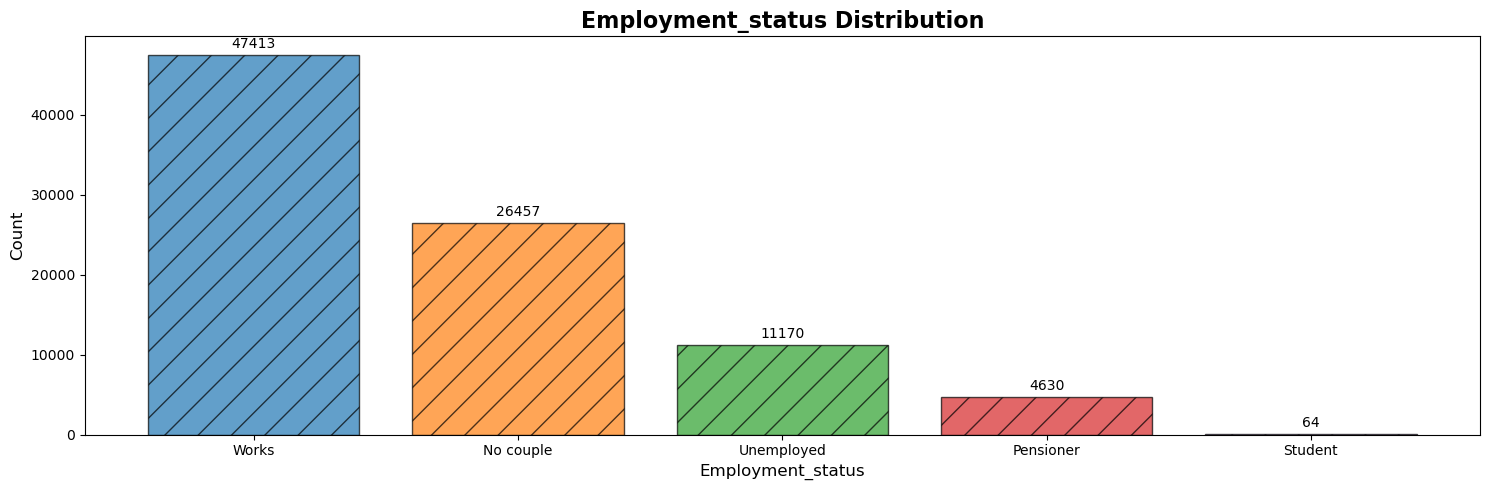

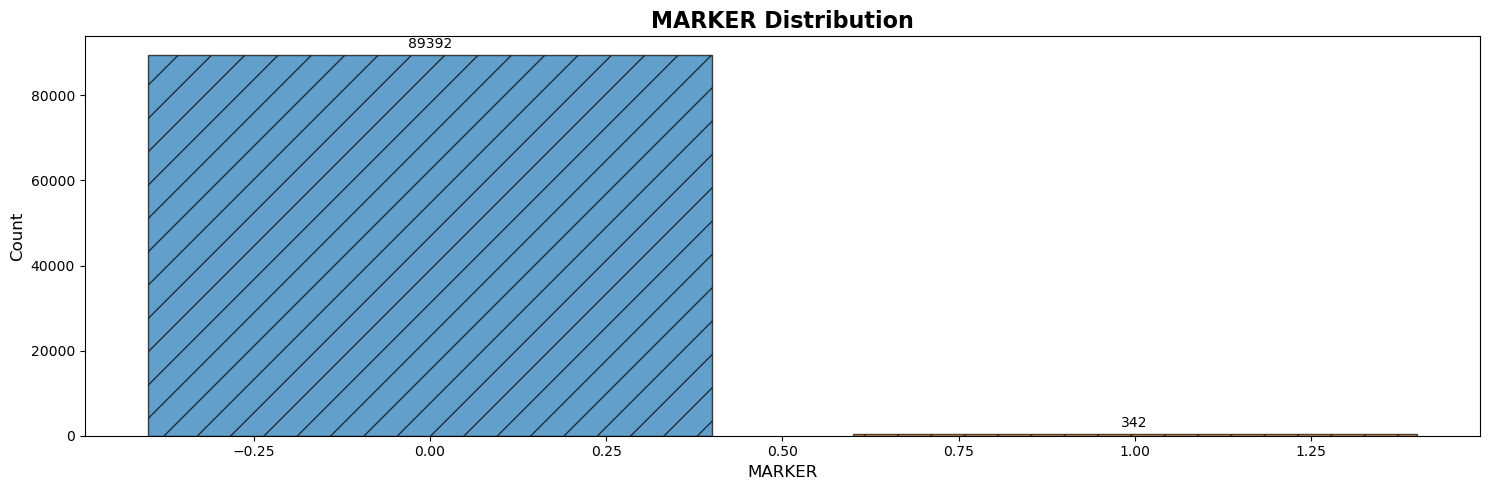

In [11]:
import matplotlib.pyplot as plt

# Custom color palette for bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

known_cols = ['Region', 'Job_title', 'Education', 'Marriage', 'Children', 'Property', 'Employment_status', 'MARKER']

# Create a new figure for each column
for i in known_cols:
    verti = train[i].value_counts().values
    hori = train[i].value_counts().index
    
    fig, ax = plt.subplots(figsize=(15, 5))

    # Bar plot with custom colors and patterns
    bars = ax.bar(hori, verti, color=custom_colors[:len(verti)], edgecolor='black', hatch='/', alpha=0.7)

    # Customize the appearance
    ax.set_title(f"{i} Distribution", fontsize=16, fontweight='bold')
    ax.set_xlabel(i, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='both', labelsize=10)

    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

    plt.tight_layout()

plt.show()


In [12]:
correlation = train.corr()
correlation.style.background_gradient(cmap='summer')

/tmp/ipykernel_20/233449514.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


,A,B,C,D,E,F,G,H,J,L,MARKER
A,1.000000,0.787760,0.279254,0.390606,0.648925,0.473056,-0.324324,-0.229381,0.154316,0.011154,-0.000378
B,0.787760,1.000000,0.282321,0.371655,0.471430,0.657744,-0.317508,-0.212887,0.081070,-0.009512,0.012089
C,0.279254,0.282321,1.000000,0.495777,0.318026,0.322362,0.019881,-0.211125,-0.002666,0.011004,0.004778
D,0.390606,0.371655,0.495777,1.000000,0.733874,0.702949,0.336855,-0.041913,0.030375,0.032271,0.034191
E,0.648925,0.471430,0.318026,0.733874,1.000000,0.782391,0.279598,0.021942,0.113036,-0.006566,0.029283
F,0.473056,0.657744,0.322362,0.702949,0.782391,1.000000,0.275341,0.044503,0.042328,-0.027840,0.047738
G,-0.324324,-0.317508,0.019881,0.336855,0.279598,0.275341,1.000000,0.597774,-0.058046,-0.036009,0.050280
H,-0.229381,-0.212887,-0.211125,-0.041913,0.021942,0.044503,0.597774,1.000000,-0.062062,-0.046920,0.072940
J,0.154316,0.081070,-0.002666,0.030375,0.113036,0.042328,-0.058046,-0.062062,1.000000,0.408005,-0.023146
L,0.011154,-0.009512,0.011004,0.032271,-0.006566,-0.027840,-0.036009,-0.046920,0.408005,1.000000,-0.031630


# <div style="background-color:#A68B4A; padding: 50px;color:white">Auto ML</div>

[image.png](attachment:43d16c7c-325d-471d-b961-1494fc388503.png)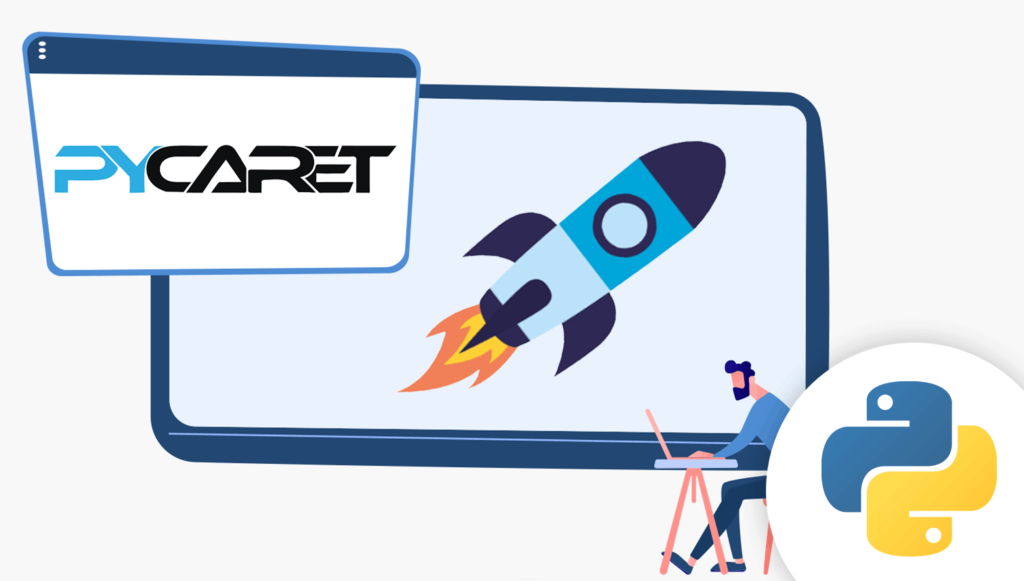
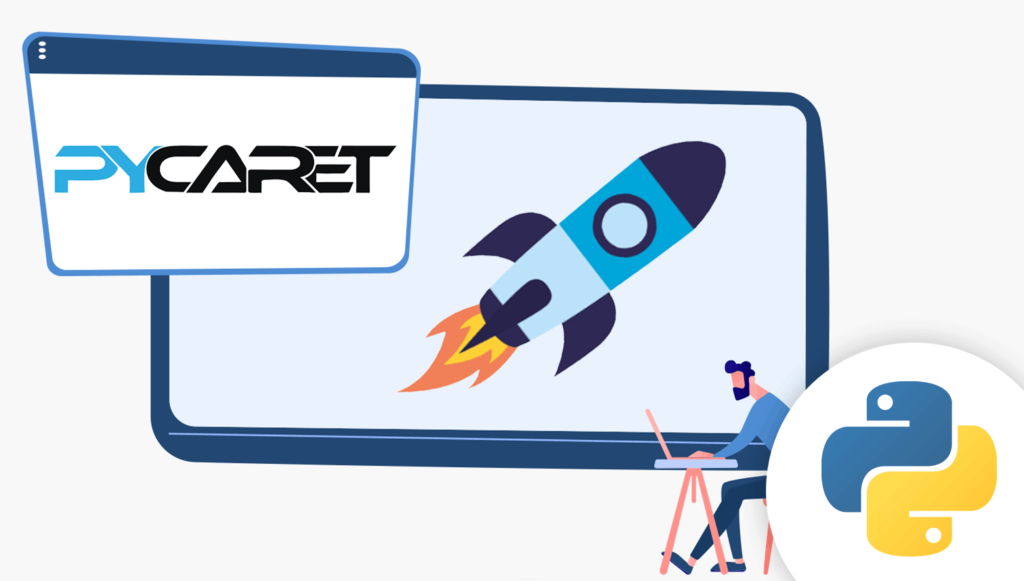

In [13]:
!python -m pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 10.8 MB

In [14]:
from pycaret.classification import *
model = setup(data = train, target = 'MARKER', experiment_name = 'Loan Borrower', session_id=123)


,Description,Value
0,Session id,123
1,Target,MARKER
2,Target type,Binary
3,Original data shape,"(89734, 25)"
4,Transformed data shape,"(89734, 53)"
5,Transformed train set shape,"(62813, 53)"
6,Transformed test set shape,"(26921, 53)"
7,Ordinal features,6
8,Numeric features,10
9,Categorical features,14


In [15]:
best_auc_models = compare_models(sort='AUC',n_select = 3)
holdout_pred = predict_model(best_auc_models[0])
#predicting on test dataset
predictions = predict_model(best_auc_models[0], data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9962,0.8682,0.0000,0.0000,0.0000,-0.0000,-0.0001,4.7330
gbc,Gradient Boosting Classifier,0.9955,0.8669,0.0000,0.0000,0.0000,-0.0012,-0.0016,9.1790
lda,Linear Discriminant Analysis,0.9958,0.8579,0.0127,0.1200,0.0226,0.0217,0.0370,0.7020
ada,Ada Boost Classifier,0.9962,0.8537,0.0000,0.0000,0.0000,0.0000,0.0000,2.6100
catboost,CatBoost Classifier,0.9961,0.8378,0.0000,0.0000,0.0000,-0.0001,-0.0002,15.7390
xgboost,Extreme Gradient Boosting,0.9961,0.8373,0.0000,0.0000,0.0000,-0.0001,-0.0002,8.8580
lightgbm,Light Gradient Boosting Machine,0.9956,0.8303,0.0168,0.0833,0.0279,0.0267,0.0357,2.9460
nb,Naive Bayes,0.8931,0.7883,0.4062,0.0147,0.0283,0.0212,0.0604,0.3790
rf,Random Forest Classifier,0.9962,0.7381,0.0000,0.0000,0.0000,0.0000,0.0000,4.0700
et,Extra Trees Classifier,0.9962,0.6898,0.0000,0.0000,0.0000,-0.0001,-0.0002,3.5160


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9962,0.8856,0.0000,0.0000,0.0000,0.0000,0.0000


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9962,0.8862,0.0000,0.0000,0.0000,0.0000,0.0000


In [16]:
# list of top 3 models by AUC
best_auc_models

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LinearDiscriminantAnalysis(covarian

In [17]:
# finalize the model
final_best = finalize_model(best_auc_models[0])
# save model to disk
save_model(final_best, 'Final-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['A', 'B', 'C', 'D', 'E', 'F', 'G',
                                              'H', 'J', 'L'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Transformer...
                                                               

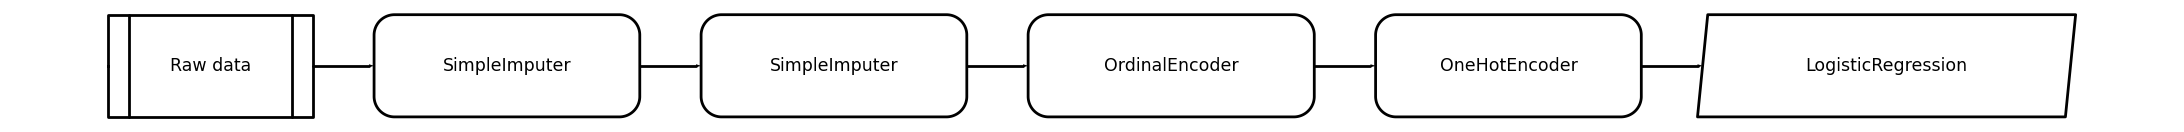




_________________________________________   auc   ___________________________________________


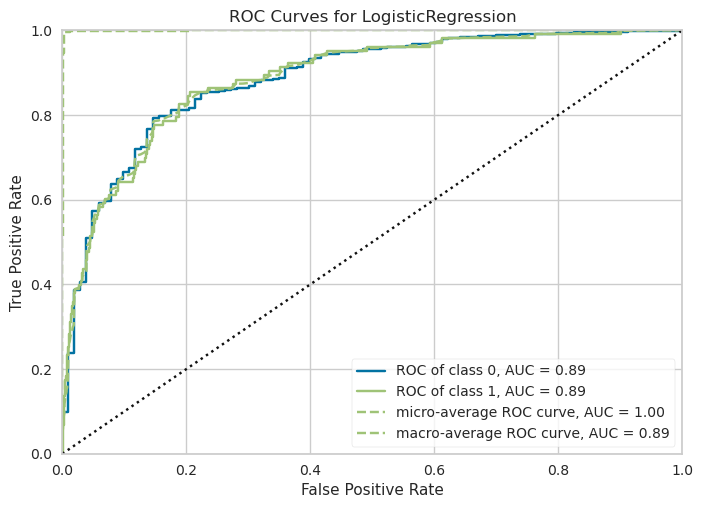




_________________________________________   pr   ___________________________________________


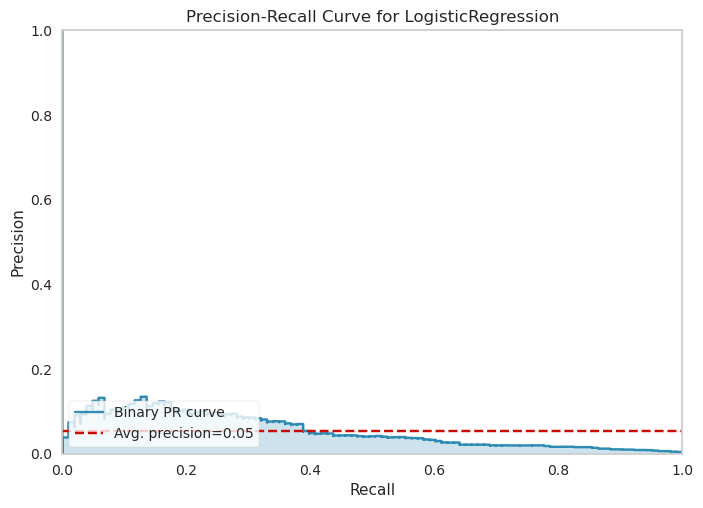




_________________________________________   confusion_matrix   ___________________________________________


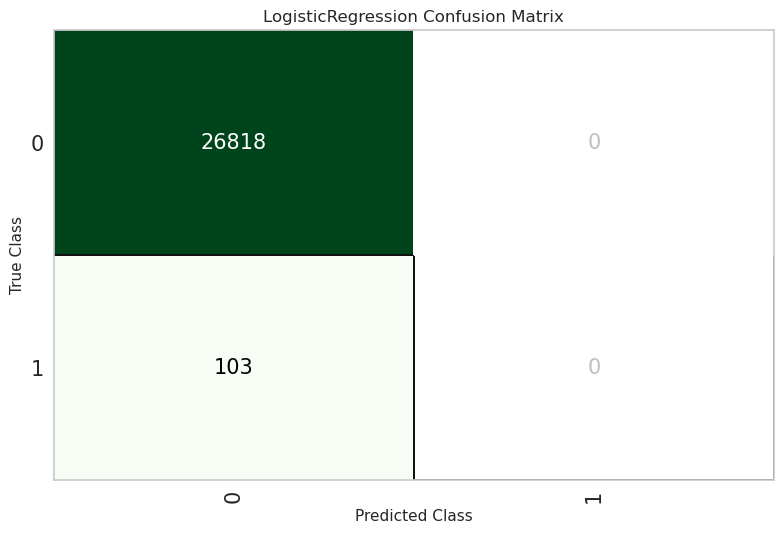




_________________________________________   error   ___________________________________________


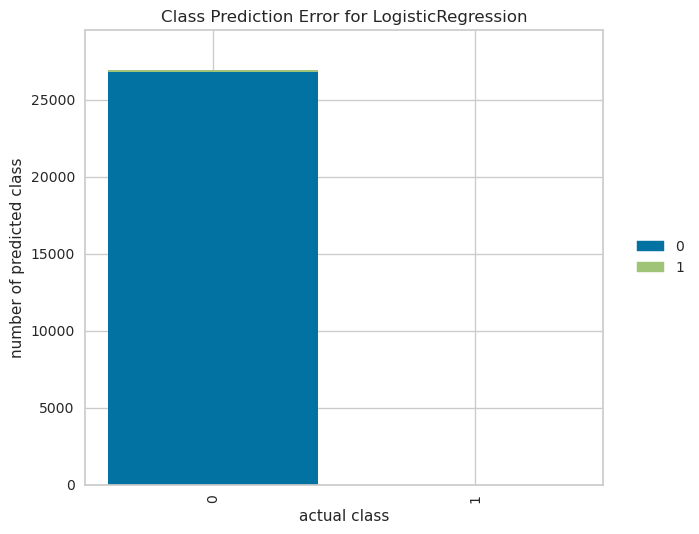




_________________________________________   class_report   ___________________________________________


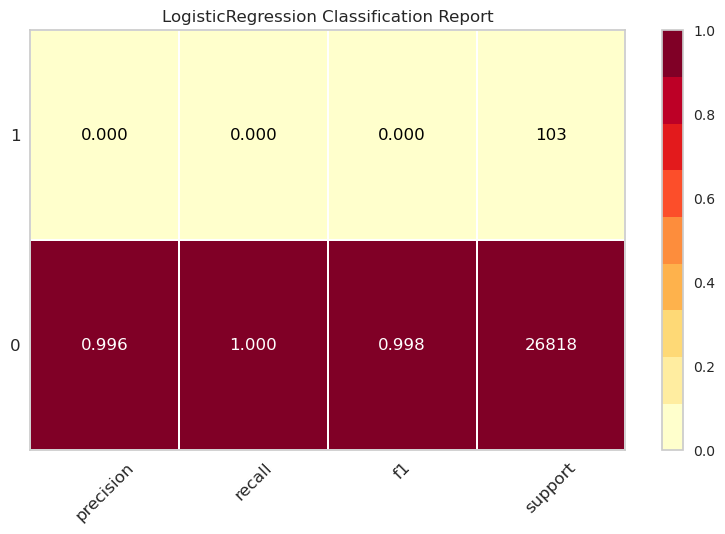




_________________________________________   calibration   ___________________________________________


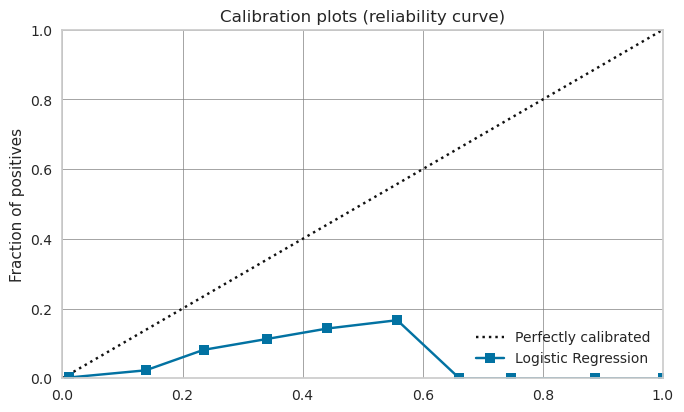




_________________________________________   feature   ___________________________________________


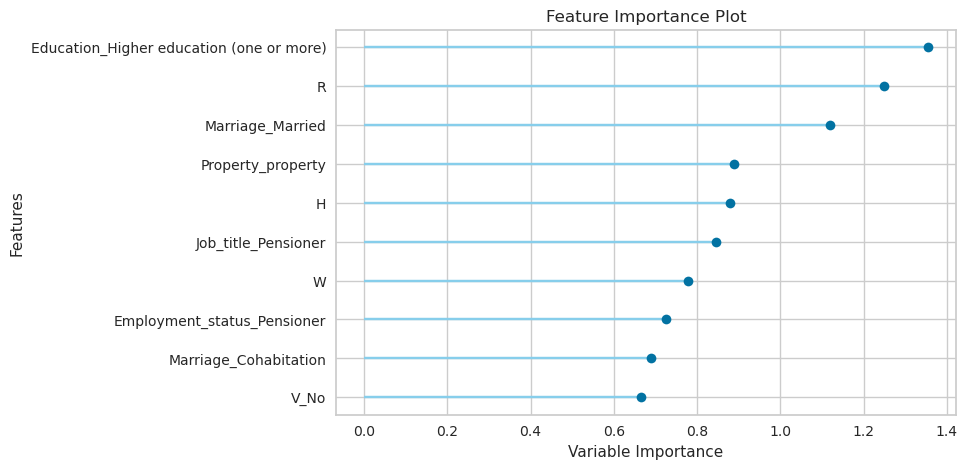




_________________________________________   parameter   ___________________________________________


,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2





_________________________________________   lift   ___________________________________________


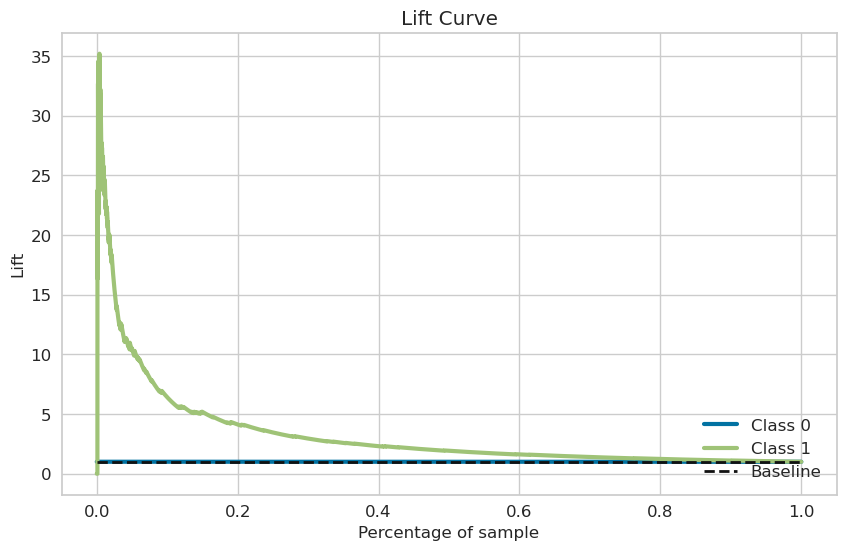




_________________________________________   gain   ___________________________________________


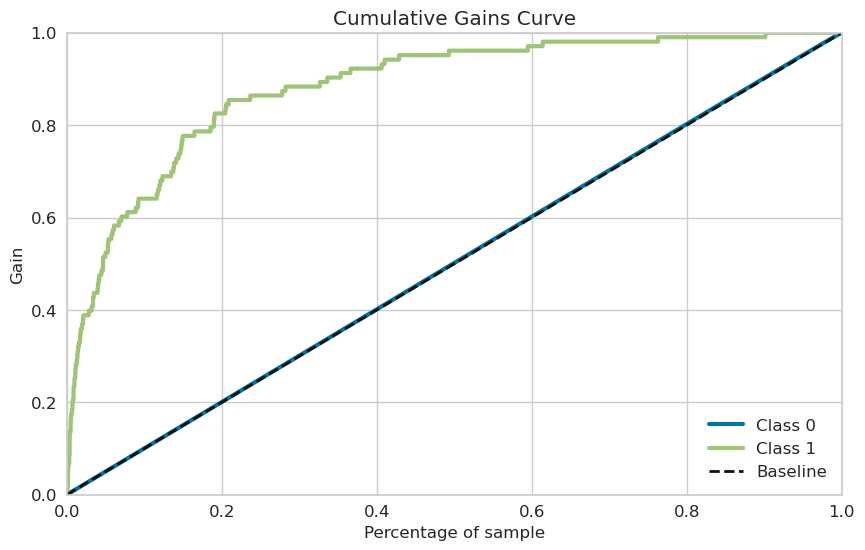

In [18]:
'''     
        Available plots in pycaret
        
        * 'pipeline' - Schematic drawing of the preprocessing pipeline
        * 'auc' - Area Under the Curve
        * 'threshold' - Discrimination Threshold
        * 'pr' - Precision Recall Curve
        * 'confusion_matrix' - Confusion Matrix
        * 'error' - Class Prediction Error
        * 'class_report' - Classification Report
        * 'boundary' - Decision Boundary
        * 'rfe' - Recursive Feature Selection
        * 'learning' - Learning Curve
        * 'manifold' - Manifold Learning
        * 'calibration' - Calibration Curve
        * 'vc' - Validation Curve
        * 'dimension' - Dimension Learning
        * 'feature' - Feature Importance
        * 'feature_all' - Feature Importance (All)
        * 'parameter' - Model Hyperparameter
        * 'lift' - Lift Curve
        * 'gain' - Gain Chart
        * 'tree' - Decision Tree
        * 'ks' - KS Statistic Plot
        
'''

available_plots = ['pipeline','auc','pr','confusion_matrix','error','class_report','calibration','feature','parameter','lift','gain']
    
for i in available_plots:
    print('_________________________________________  ',i,'  ___________________________________________',sep=' ')
    plot_model(best_auc_models[0],plot=i)
    print('\n\n')

In [19]:
# blend top 3 models
#uncomment below to blend 

blender = blend_models(best_auc_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9962,0.8764,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9960,0.8947,0.0000,0.0000,0.0000,-0.0003,-0.0008
2,0.9962,0.8439,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9963,0.8806,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9962,0.8968,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9962,0.8739,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9962,0.8198,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9962,0.8742,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9962,0.8901,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [20]:
blender

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_a...
                                                         n_iter_no_change=None,
                                                         random_state=123,
                                                         subsample=1.0,
                                                         tol=0.0001,
                                                         validation_fraction=0.1,
                                                         verbose=0,
                                                         warm_start=False)),
                             ('Linear Discriminant Analysis',
                              LinearDiscriminantAnalysis(covariance_estimator=None,
                                                         n_components=None,
                                                         priors=None,
                                                         shrinkage=None,
                                                         solver='svd',
                                                         store_covariance=False,
                                                         tol=0.0001))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [21]:
holdout_pred = predict_model(blender)
#predicting on test dataset
predictions = predict_model(blender, data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9961,0.8825,0.0000,0.0000,0.0000,-0.0001,-0.0005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9962,0.8959,0.0000,0.0000,0.0000,0.0000,0.0000
